In [2]:
#LAKSHAAY SINGHAL
#Task_2_Prediction_Using_Unsupervised_ML
#GRIP-AUGUST-2021

In [4]:
#Import the libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
#reading data from remote link

In [13]:

Iris_data = pd.read_csv("D:/Downloads/Iris.csv")
Iris_data.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
Iris_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [16]:
#next, we check the null values column wise

In [17]:
Iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [18]:
#next, we check the null values row wise

In [19]:

Iris_data.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    0
147    0
148    0
149    0
Length: 150, dtype: int64

In [20]:

#next, we check for duplicate values

In [21]:
Iris_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [22]:
#next we count each species present in the dataset
Iris_data.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [23]:

#Check for outliers

In [24]:
#EDA
#We make boxplots for all the numeric columns

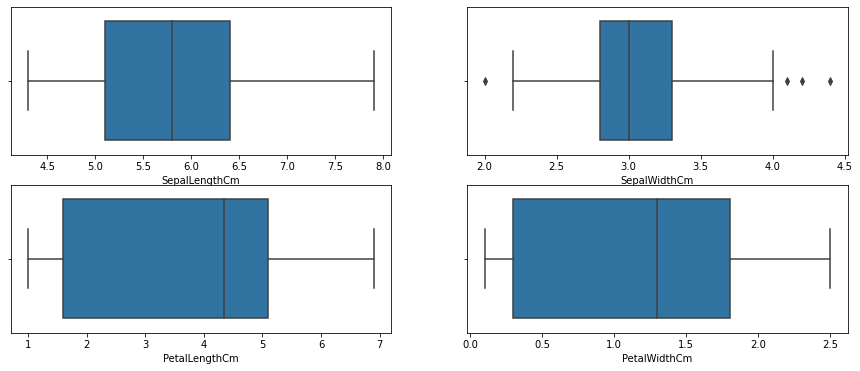

In [25]:
plt.figure(figsize =(15,6))
features = Iris_data.columns[1:5]
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(Iris_data[i[1]])

In [26]:
#We make boxplots for all the numeric columns and compare with the species attribute

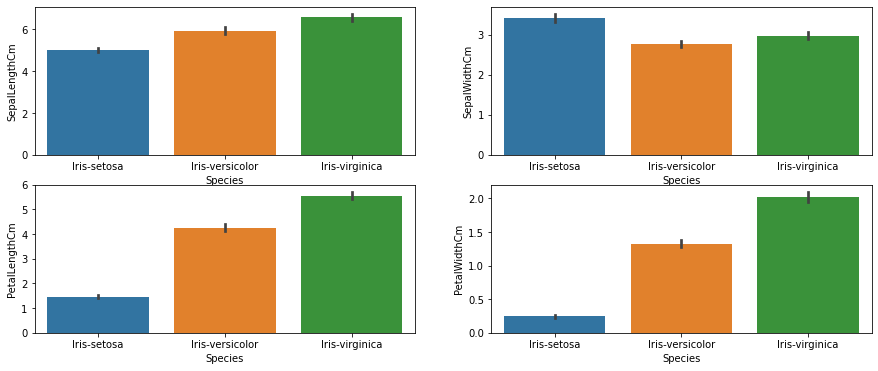

In [27]:
plt.figure(figsize =(15,6))
features = Iris_data.columns[1:5]
for i in enumerate(features):
    plt.subplot(2,2,i[0]+1)
    sns.barplot(x=Iris_data["Species"], y=Iris_data[i[1]])

In [28]:
Iris_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
Iris_data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [30]:

from sklearn.cluster import KMeans

In [31]:
SSE = []
for i in range (1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init="k-means++")
    kmeans.fit(Iris_data.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

In [32]:
kmeans = KMeans(n_jobs = -1,n_clusters =3, init ="k-means++")
kmeans.fit(Iris_data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

In [33]:
kmeans =KMeans(n_jobs = -1, n_clusters =3, init = "k-means++")
kmeans.fit(Iris_data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[ 74.5       ,   5.922     ,   2.78      ,   4.206     ],
       [125.        ,   6.57058824,   2.97058824,   5.52352941],
       [ 25.        ,   5.00612245,   3.42040816,   1.46530612]])

In [34]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
Iris_data["cluster"] = kmeans.labels_

In [36]:

Iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1


In [37]:

display(Iris_data["cluster"].value_counts(), Iris_data["Species"].value_counts())

1    51
0    50
2    49
Name: cluster, dtype: int64

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

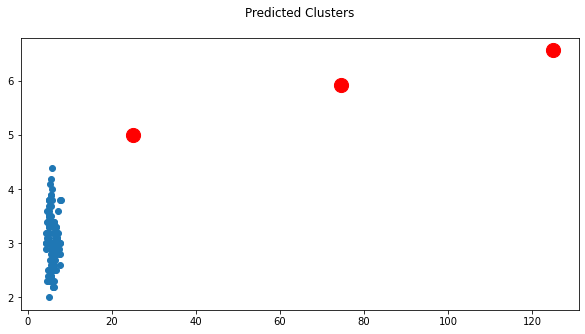

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(Iris_data["SepalLengthCm"],Iris_data["SepalWidthCm"])
plt.title("Predicted Clusters\n")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=200,c="red",label="Centroids")
plt.show()

In [39]:
Iris_data.loc[Iris_data["Species"]=="Iris-setosa"]["cluster"].value_counts()

2    49
0     1
Name: cluster, dtype: int64

In [40]:
Iris_data.loc[Iris_data["Species"]=="Iris-versicolor"]["cluster"].value_counts()

0    49
1     1
Name: cluster, dtype: int64

In [41]:
Iris_data.loc[Iris_data["Species"]=="Iris-virginica"]["cluster"].value_counts()

1    50
Name: cluster, dtype: int64

In [42]:
Iris_data["Species_encoded"] = Iris_data["Species"].apply(lambda x: 1 if x=="Iris-setosa" else 2 if x =="Iris-virginica" else 0)
Iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2,1
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1,2


In [43]:
from sklearn.metrics import classification_report
print(classification_report(Iris_data["Species_encoded"],Iris_data["cluster"]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.33      0.33      0.33       150
weighted avg       0.33      0.33      0.33       150



<AxesSubplot:>

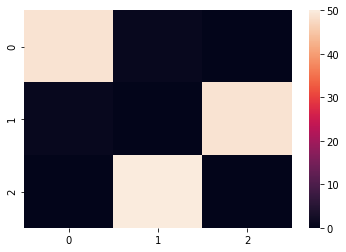

In [44]:

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(Iris_data["Species_encoded"],Iris_data["cluster"]))